In [18]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\scrat\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Found 100 files belonging to 5 classes.
Forma de X_train: (100, 224, 224, 3)
Forma de y_train: (100,)
Número de imágenes de martillo: 20
Número de imágenes de otras herramientas: 80
Tamaño de X_train_no_martillo: 80


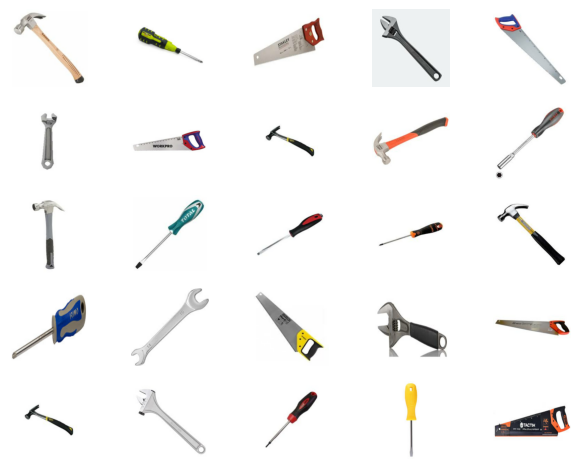

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# Ruta a tu carpeta que contiene las imágenes
dataset_path = "C:/Users/scrat/Downloads/OrdenamientoH"

# Cargar las imágenes y etiquetas usando `image_dataset_from_directory`
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),  # Ajusta el tamaño de las imágenes
    batch_size=32,
    label_mode="int",  # Las etiquetas serán enteros
    shuffle=True
)

# Extraer X_train (imágenes) y y_train (etiquetas) del dataset
X_train = []
y_train = []

for images, labels in dataset:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

# Convertir las listas a arrays de numpy
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Verificar que X_train y y_train tengan las mismas formas
print(f"Forma de X_train: {X_train.shape}")  # Esperado: (n_samples, 224, 224, 3)
print(f"Forma de y_train: {y_train.shape}")  # Esperado: (n_samples,)

# Filtrar imágenes que corresponden a "martillo" (etiqueta 0)
X_train_martillo = X_train[y_train == 0][:100]  # Etiqueta 0 corresponde a "martillo"

# Filtrar imágenes que no corresponden a "martillo"
X_train_no_martillo = X_train[y_train != 0][:100]  # Otras herramientas

# Verificar la cantidad de imágenes de cada clase
print(f"Número de imágenes de martillo: {len(X_train_martillo)}")
print(f"Número de imágenes de otras herramientas: {len(X_train_no_martillo)}")

# Función para mostrar 25 imágenes aleatorias
def plot_samples(X):
    if len(X) == 0:
        print("El conjunto de imágenes está vacío.")
        return
    
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X) - 1)  # Elegir una imagen aleatoria
        img = X[i]
        
        # Normalizar las imágenes (de 0-255 a 0-1 si es necesario)
        img = img / 255.0  # Esto normaliza las imágenes para la visualización

        ax.imshow(img)
        ax.axis('off')  # No mostrar los ejes
    plt.tight_layout()
    plt.show()

# Verificar que X_train_no_martillo no está vacío
print(f"Tamaño de X_train_no_martillo: {len(X_train_no_martillo)}")

# Solo llamar a la función si hay imágenes
if len(X_train_no_martillo) > 0:
    plot_samples(X_train_no_martillo)
else:
    print("No hay imágenes de otras herramientas para mostrar.")

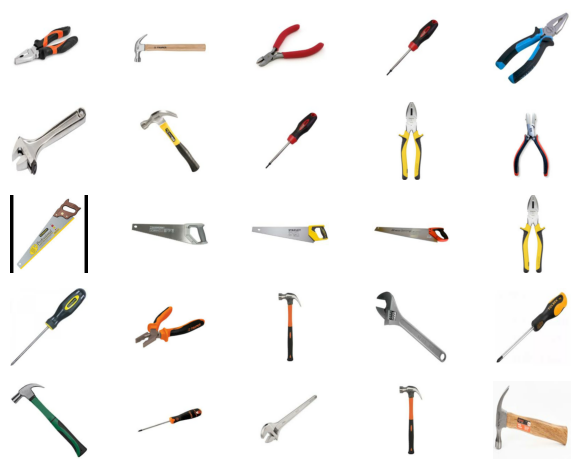

In [50]:
plot_samples(X_train)

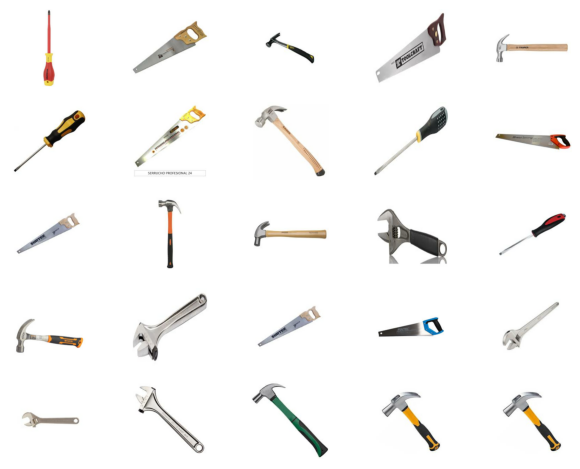

In [51]:
plot_samples(X_train_no_martillo)

In [53]:
import os
from pathlib import Path
from PIL import Image
import shutil
import random
import numpy as np

path = Path('dataset')  # Ruta base para guardar el dataset

def generate_dataset(X_martillo, X_not_martillo, test_size):
    # Eliminar el directorio anterior si existe
    if path.exists():
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

    # Crear carpetas para train y test, con subcarpetas para las clases
    splits = ['train', 'test']
    for split in splits:
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / 'martillo', exist_ok=True)
        os.makedirs(path / split / 'not_martillo', exist_ok=True)
        
        # Dividir los datos en conjuntos de entrenamiento y prueba
        if split == 'train':
            X1, X2 = X_martillo[:-test_size], X_not_martillo[:-test_size]
        else:
            X1, X2 = X_martillo[-test_size:], X_not_martillo[-test_size:]
        
        # Guardar las imágenes en las carpetas correspondientes
        for x1 in X1:
            filename = f'{random.randint(0, 99999):05d}.png'
            img = Image.fromarray((x1 * 255).astype('uint8'))  # Convertir a imagen
            img.save(path / split / 'martillo' / filename)
        for x2 in X2:
            filename = f'{random.randint(0, 99999):05d}.png'
            img = Image.fromarray((x2 * 255).astype('uint8'))  # Convertir a imagen
            img.save(path / split / 'not_martillo' / filename)

# Asegúrate de que tienes X_train_martillo y X_train_no_martillo definidos previamente
# Como ya los creaste al filtrar los datos:
X_martillo = X_train_martillo
X_not_martillo = X_train_no_martillo

# Llamar a la función con tus datos
test_size = 10  # Número de muestras en el conjunto de test
generate_dataset(X_martillo, X_not_martillo, test_size)

print("Dataset generado con éxito.")

Dataset generado con éxito.
